In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Essa foi apenas uma análise exploratória simples em busca de informações interessantes, como por exemplo, descobrimos que no ano de 2016 no qual os estados da Bahia e Pernambuco foram os estados que mais não atenderam as reclamações feitas pelos consumidores, e que também a **Samsung** não foi tão eficiente assim no atendimento de chamados(é a top 1 das empresas que mais não atendeream seus consumidores), dentre outras observações.

In [49]:
reclamacoes_df = pd.read_csv('reclamacoes-fundamentadas-sindec-2016.csv')

In [50]:
reclamacoes_df.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2016,2016-02-17 13:43:08.000,2015-10-29 10:59:59.000,2,Nordeste,PE,CVC BRASIL OPERADORA E AGENCIA DE VIAGENS S.A.,CVC,1,1.076026e+13,...,7911200.0,AGÊNCIAS DE VIAGENS,S,276,Agências e Operadoras de viagens (pacotes turí...,205.0,"Consulta Sobre Serviços (Pesquisa, cartilha, e...",M,entre 61 a 70 anos,52061540.0
1,2016,2016-12-15 18:11:35.000,2016-11-18 14:52:22.000,2,Nordeste,PE,GIORGIO ARMANI BRASIL COMERCIO,EMPORIO ARMANI,1,1.318050e+13,...,NaN,NaN,N,132,Vestuário ( Calçado / Roupa ),105.0,Produto com vício,F,entre 31 a 40 anos,51010140.0
2,2016,2016-09-16 09:01:46.000,2016-06-29 13:58:35.000,2,Nordeste,PE,COMPANHIA ENERGETICA DE PERNAMBUCO,CELPE,1,1.083593e+13,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,S,185,Energia Elétrica,134.0,Cobrança indevida/abusiva,F,entre 51 a 60 anos,53060600.0
3,2016,2016-02-18 13:30:30.000,2016-01-21 12:23:51.000,2,Nordeste,PE,MOURA DUBEUX,MOURA DUBEUX,1,1.204963e+13,...,4120400.0,CONSTRUÇÃO DE EDIFÍCIOS,S,82,Incorporação ( Construtoras e Incorporadoras ),88.0,Não entrega do contrato,M,entre 51 a 60 anos,53090220.0
4,2016,2016-11-09 14:20:36.000,2016-10-07 16:39:59.000,2,Nordeste,PE,ASSOCIAÇÃO UNIFICADA PAULISTA DE ENSINO RENOVADO,UNIP,1,NaN,...,NaN,NaN,S,233,"Escola ( Pré, 1º, 2º Graus e Superior )",199.0,"Documentos: não fornecimento (escolares, recib...",F,entre 21 a 30 anos,53437100.0


In [51]:
reclamacoes_df['UF'].unique()

array(['PE', 'SC', 'PR', 'GO', 'MA', 'RJ', 'PB', 'ES', 'MS', 'BA', 'DF',
       'MG', 'CE', 'TO', 'RN', 'AM', 'MT', 'PA', 'PI', 'RO', 'SP', 'RS',
       'AL'], dtype=object)

In [52]:
reclamacoes_df['Regiao'].unique()

array(['Nordeste', 'Sul', 'Centro-oeste', 'Sudeste', 'Norte'], dtype=object)

### Região Nordeste

In [53]:
nordeste = (reclamacoes_df['Regiao'] == 'Nordeste')
reclamacoes_nordeste = reclamacoes_df[nordeste]

In [54]:
reclamacoes_nordeste.shape

(66411, 23)

In [55]:
reclamacoes_nordeste.columns

Index([u'AnoCalendario', u'DataArquivamento', u'DataAbertura', u'CodigoRegiao',
       u'Regiao', u'UF', u'strRazaoSocial', u'strNomeFantasia', u'Tipo',
       u'NumeroCNPJ', u'RadicalCNPJ', u'RazaoSocialRFB', u'NomeFantasiaRFB',
       u'CNAEPrincipal', u'DescCNAEPrincipal', u'Atendida', u'CodigoAssunto',
       u'DescricaoAssunto', u'CodigoProblema', u'DescricaoProblema',
       u'SexoConsumidor', u'FaixaEtariaConsumidor', u'CEPConsumidor'],
      dtype='object')

### Vamos explorar a questão do atendimento das questões(atendidas e não atendidas)

In [56]:
reclamacoes_nordeste['Atendida'].unique()

array(['S', 'N'], dtype=object)

In [57]:
reclamacoes_nordeste['Atendida'].describe()

count     66411
unique        2
top           S
freq      41090
Name: Atendida, dtype: object

In [58]:
atendidas = reclamacoes_nordeste['Atendida'] == 'S'
nao_atendidas = reclamacoes_nordeste['Atendida'] == 'N'
reclamacoes_atendidas_ne = reclamacoes_nordeste[atendidas]
reclamacoes_naoatendidas_ne = reclamacoes_nordeste[nao_atendidas]

In [77]:
print('Reclamações antedidas: %d %.2f%%' %(len(reclamacoes_atendidas_ne), float(len(reclamacoes_atendidas_ne))/len(reclamacoes_nordeste['Atendida'])*100 ))
print('Reclamações não antedidas: %d %.2f%%' %(len(reclamacoes_naoatendidas_ne),  float(len(reclamacoes_naoatendidas_ne))/len(reclamacoes_nordeste['Atendida'])*100))

Reclamações antedidas: 41090 61.87%
Reclamações não antedidas: 25321 38.13%


### Vamos explorar as reclamações não atendidas

In [78]:
reclamacoes_naoatendidas_ne.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
1,2016,2016-12-15 18:11:35.000,2016-11-18 14:52:22.000,2,Nordeste,PE,GIORGIO ARMANI BRASIL COMERCIO,EMPORIO ARMANI,1,1.318050e+13,...,NaN,NaN,N,132,Vestuário ( Calçado / Roupa ),105.0,Produto com vício,F,entre 31 a 40 anos,51010140.0
6,2016,2016-08-18 09:48:59.000,2016-05-16 09:02:35.000,2,Nordeste,PE,RIACHUELO MIDWAY S/A,MIDWAY FINANCEIRA-RIACHUELO,1,9.464032e+12,...,6436100.0,"SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTI...",N,54,Cartão de Crédito,247.0,SAC - Resolução de demandas (ausência de respo...,F,entre 41 a 50 anos,53600000.0
19,2016,2016-02-29 18:22:19.000,2016-01-11 10:56:08.000,2,Nordeste,MA,TOTAL MOTOS,NaN,1,NaN,...,NaN,NaN,N,141,Outros Produtos Importados,119.0,"Compra de veiculo (multa, transferência, alien...",F,entre 51 a 60 anos,NaN
25,2016,2016-11-24 11:16:40.000,2014-12-04 16:45:50.000,2,Nordeste,PB,BMG MULTIFAQ-1 FUNDO DE APLIC EM QUOTAS FUNDOS...,BANCO BMG,1,1.135423e+12,...,6470101.0,"FUNDOS DE INVESTIMENTO, EXCETO PREVIDENCIÁRIOS...",N,63,Financeira,27.0,"Contrato (não cumprimento, alteração, transfer...",F,entre 51 a 60 anos,58441000.0
27,2016,2016-05-20 14:15:49.000,2014-06-17 10:36:14.000,2,Nordeste,PB,BMG MULTIFAQ-1 FUNDO DE APLIC EM QUOTAS FUNDOS...,BANCO BMG,1,1.135423e+12,...,6470101.0,"FUNDOS DE INVESTIMENTO, EXCETO PREVIDENCIÁRIOS...",N,76,Outros Contratos,250.0,Problemas com crédito consignado,F,entre 61 a 70 anos,58400500.0


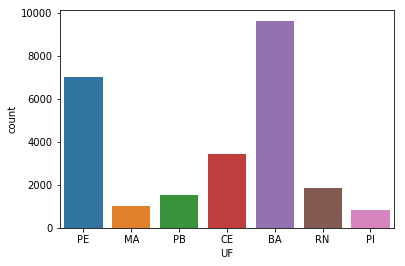

In [81]:
sns.countplot(x="UF", data=reclamacoes_naoatendidas_ne)

In [85]:
reclamacoes_naoatendidas_ne['FaixaEtariaConsumidor'].describe()

count                  25321
unique                     8
top       entre 31 a 40 anos
freq                    6064
Name: FaixaEtariaConsumidor, dtype: object

In [112]:
reclamacoes_naoatendidas_ne['FaixaEtariaConsumidor'].value_counts()

entre 31 a 40 anos    6064
entre 41 a 50 anos    5163
entre 21 a 30 anos    4263
entre 51 a 60 anos    4059
entre 61 a 70 anos    2852
mais de 70 anos       1341
Nao Informada          978
até 20 anos            601
Name: FaixaEtariaConsumidor, dtype: int64

In [100]:
values = reclamacoes_naoatendidas_ne['strRazaoSocial'].value_counts()

In [101]:
name = np.array(values.index)
values = np.array(values)

In [103]:
top5 = pd.DataFrame({'empresa':name, 'qtd': values})
top5.index = np.arange(1, len(top5)+1)
top5 = top5.head()
top5

,empresa,qtd
1,SAMSUNG ELETRONICA DA AMAZONIA LTDA,471
2,COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA,433
3,VIA VAREJO S/A,430
4,SKY BRASIL SERVICOS LTDA,353
5,TELEMAR NORTE LESTE S/A,336


In [95]:
values = reclamacoes_naoatendidas_ne['DescricaoAssunto'].value_counts()
names = np.array(values.index)
values = np.array(values)

In [96]:
top5_descricao_assunto = pd.DataFrame({'descricao_assunto': names, 'qtd': values})
top5_descricao_assunto.index = np.arange(1, len(top5_descricao_assunto)+1)
top5_descricao_assunto = top5_descricao_assunto.head()

In [97]:
top5_descricao_assunto

,descricao_assunto,qtd
1,"Telefone ( Convencional, Celular, Interfone, E...",3096
2,Cartão de Crédito,2243
3,Banco comercial,1378
4,Microcomputador / Produtos de Informática,1281
5,Telefonia Celular,1002


In [113]:
reclamacoes_naoatendidas_ne['DescricaoProblema'].describe()

count                 25320
unique                  153
top       Produto com vício
freq                   7393
Name: DescricaoProblema, dtype: object